In [93]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix

In [94]:
#Import data
info_csv = pd.read_csv('../test_data/ready_for_training.csv')

In [95]:
target = info_csv['type']
info_csv = info_csv.drop('type', axis=1)

In [96]:
info_csv.head()

,dport,having_ip_address,hostname_length,count_dir,count-www,fd_length,url_length,abnormal_url,count-http,count-letters,...,count-digits,count-,count=,count-https,sus_url,count?,count%,short_url,count@,count_embed_domain
0,80,False,16,0,0,0,16,0,0,13,...,0,1,0,0,0,0,0,0,0,0
1,80,False,11,2,0,5,35,0,0,29,...,1,0,0,0,0,0,0,0,0,0
2,80,False,14,3,0,7,31,0,0,25,...,1,0,0,0,0,0,0,0,0,0
3,80,False,21,1,1,9,88,1,1,63,...,7,1,4,0,0,1,0,0,0,0
4,80,False,23,1,0,9,235,1,1,199,...,22,1,3,0,0,1,0,0,0,0


In [97]:
X_train, X_test, y_train, y_test = train_test_split(info_csv, target, test_size=0.30)

In [98]:
pca = PCA(n_components=None)
pca.fit(X_train)

PCA()

In [99]:
exp_var = pca.explained_variance_ratio_ * 100
cum_exp_var = np.cumsum(exp_var)
print(len(exp_var))

22


<BarContainer object of 22 artists>

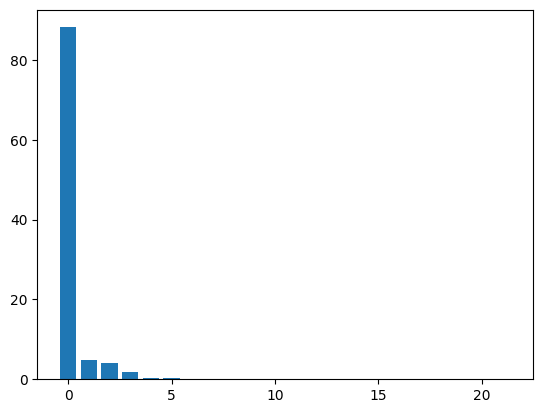

In [100]:
plt.bar(range(len(exp_var)), exp_var, align='center',
        label='Individual explained variance')

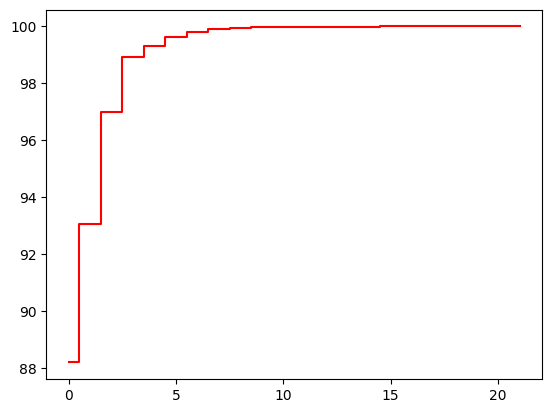

In [101]:
plt.step(range(len(cum_exp_var)), cum_exp_var, where='mid',
         label='Cumulative explained variance', color='red')

In [102]:
# Create an instance of the PCA class
pca2 = PCA(n_components=2)

In [103]:
# Fit the PCA model to your data
pca2.fit(X_train)

PCA(n_components=2)

In [104]:
# Transform the data to the first two principal components
X_train_pca2 = pca2.transform(X_train)

In [105]:
# Plot the transformed data
#sns.scatterplot(X_train_pca2[:, 0], X_train_pca2[:, 1], palette=['green', 'blue'])
#plt.show()

In [106]:
rfc = RandomForestClassifier(n_estimators=500)
rfc.fit(X_train_pca2, y_train)

RandomForestClassifier(n_estimators=500)

In [107]:
X_test_pca2 = pca2.transform(X_test)

In [108]:
output_predictions = rfc.predict(X_test_pca2)

In [109]:
print(confusion_matrix(y_test,output_predictions))

[[ 194   98   16]
 [  22 3705  308]
 [   5  451  532]]


In [110]:
print(classification_report(y_test,output_predictions))

              precision    recall  f1-score   support

           0       0.88      0.63      0.73       308
           1       0.87      0.92      0.89      4035
           2       0.62      0.54      0.58       988

    accuracy                           0.83      5331
   macro avg       0.79      0.70      0.73      5331
weighted avg       0.83      0.83      0.83      5331

